# Visualisation
## Part 1: Of Weights

In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

# Module imports
import model_lib
import vis_lib

In [4]:
# Soft placement
tfe=tf.contrib.eager
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
tfe.enable_eager_execution(config=config)

ValueError: Trying to change the options of an active eager execution. Context config: gpu_options {
  allow_growth: true
}
, specified config: gpu_options {
  allow_growth: true
}
. Context device policy: None, specified device policy: None. Context execution mode: 0,  specified execution mode None.

In [5]:
model=model_lib.create_model()

checkpoint_dir='/tmp/tensorflow/mnist/checkpoints'

checkpoint = tf.train.Checkpoint(model=model)
# Restore variables on creation if a checkpoint exists.
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1, 28, 28)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 28, 28)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 14, 14)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               784500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
__________

In [8]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [9]:
layer_dict

{'conv2d': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f82c6d69f28>,
 'conv2d_1': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f82c6d5e0f0>,
 'dense': <tensorflow.python.keras.layers.core.Dense at 0x7f82c6d5e2e8>,
 'dense_1': <tensorflow.python.keras.layers.core.Dense at 0x7f82c6d5e4a8>,
 'dropout': <tensorflow.python.keras.layers.core.Dropout at 0x7f82c6d5e438>,
 'flatten': <tensorflow.python.keras.layers.core.Flatten at 0x7f82c6d5e208>,
 'max_pooling2d': <tensorflow.python.keras.layers.pooling.MaxPooling2D at 0x7f82c6d69dd8>,
 'reshape': <tensorflow.python.keras.layers.core.Reshape at 0x7f82c6d69eb8>}

In [25]:
print((layer_dict['conv2d'].get_weights()[0].shape))

(3, 3, 1, 32)


In [20]:
print((layer_dict['conv2d_1'].get_weights()[0].shape))

(3, 3, 32, 32)


In [23]:
print((layer_dict['conv2d'].get_weights()[1]))

[ 2.53937729e-02  5.59442453e-02  5.31031284e-04  2.94846594e-02
 -3.59718106e-03  1.48029404e-03  5.30016907e-02  1.38117536e-03
  2.47731950e-04  8.27500422e-04 -1.33510795e-04 -3.76870716e-03
  5.23707382e-02  9.95212467e-04  3.82734425e-02  6.69275671e-02
 -9.62344129e-05  3.47066368e-03 -1.09510854e-01 -6.42089359e-03
  1.46316437e-04 -1.67115545e-03 -9.93039066e-05  9.89340097e-02
 -3.79418842e-02  4.47725467e-02 -1.39242818e-03 -1.19459303e-03
 -2.43596453e-02 -5.90964109e-02  1.35010632e-04  4.13997881e-02]


In [34]:
def visualise_layer(layer_name):
    '''
    Visualise weights of a layer.
    
    Only the convolutional layers.
    '''
    # Path to save
    path='/tmp/tensorflow/mnist/vis/'

    if not os.path.exists(path):
        os.makedirs(path)
        
    layer=layer_dict[layer_name]
    weights=layer.get_weights()[0]
    weights=np.sum(weights,axis=2)
    
    for j in range(weights.shape[2]):
        plt.imshow(weights[:,:,j],cmap='Greys')
        plt.title("Filter at {} , filter number {}".format(layer_name,j))
        plt.savefig(os.path.join(path,"filter-{}-{}.jpg".format(layer_name,j)))
        plt.show()

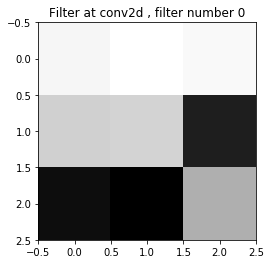

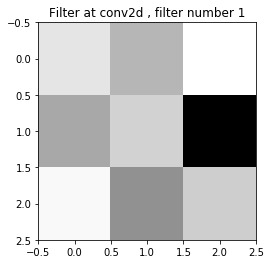

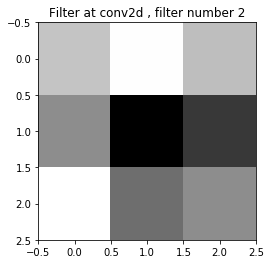

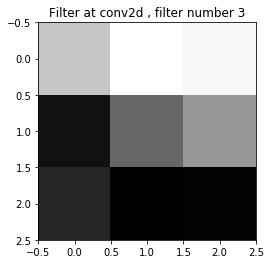

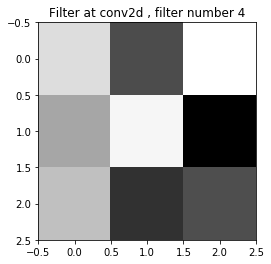

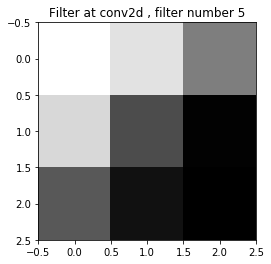

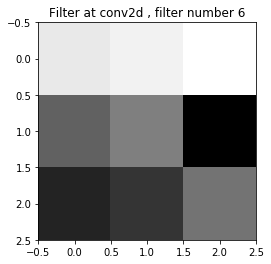

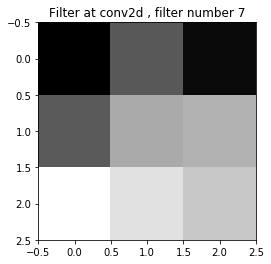

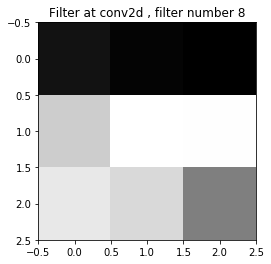

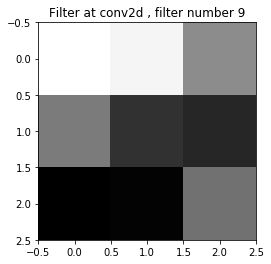

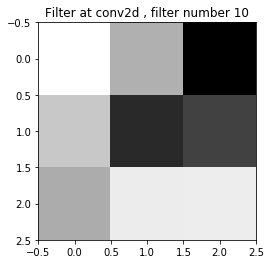

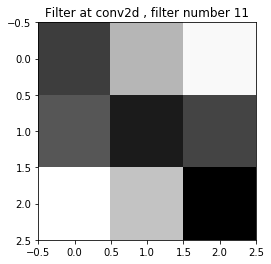

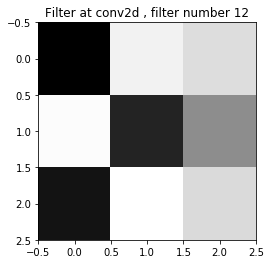

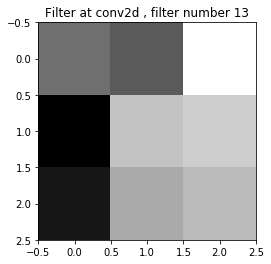

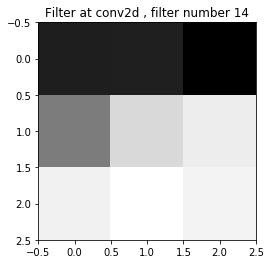

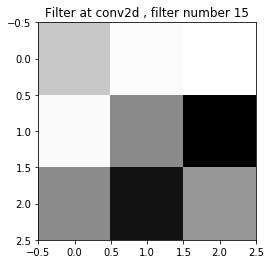

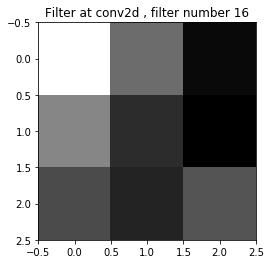

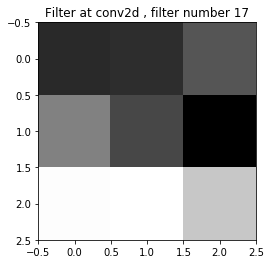

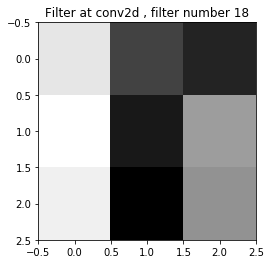

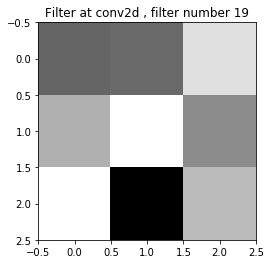

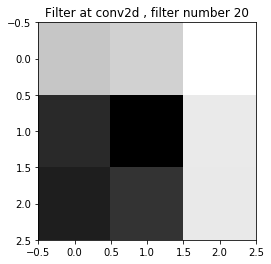

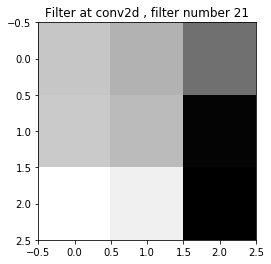

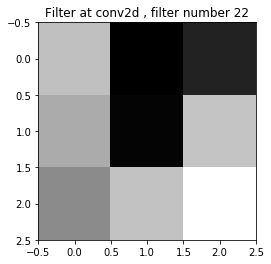

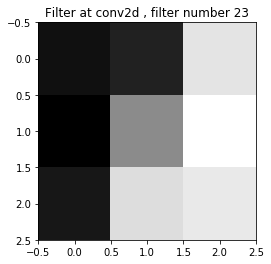

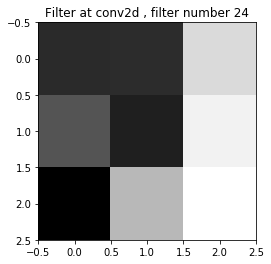

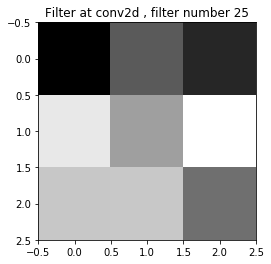

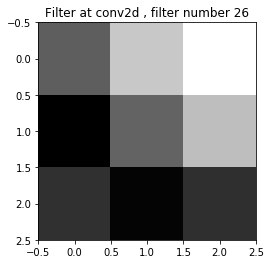

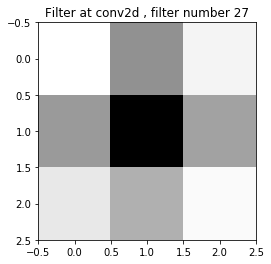

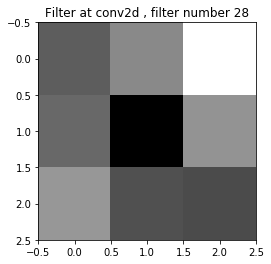

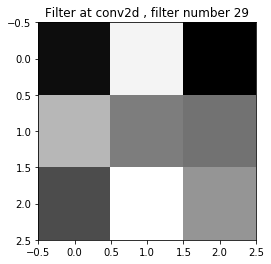

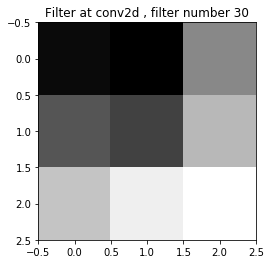

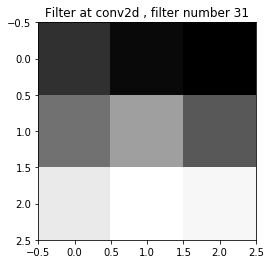

In [35]:
visualise_layer('conv2d')

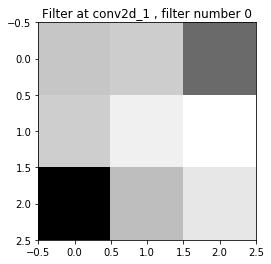

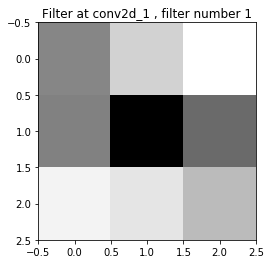

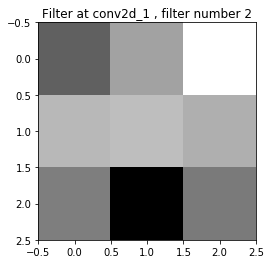

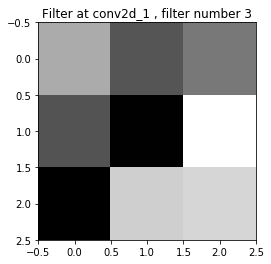

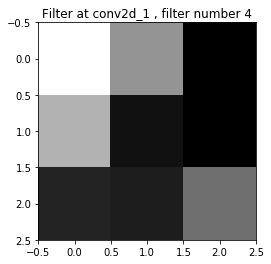

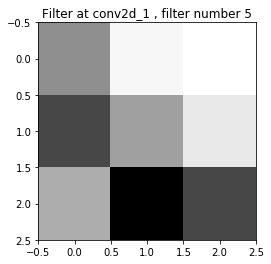

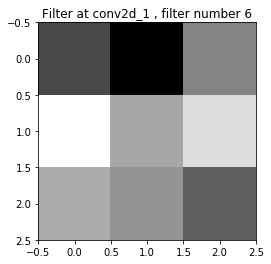

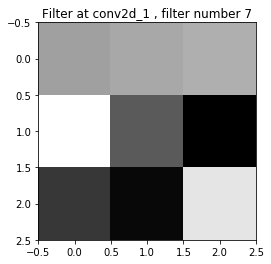

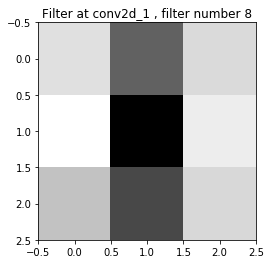

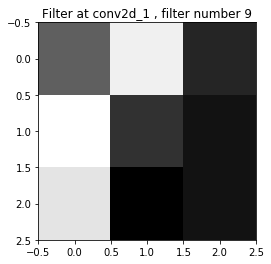

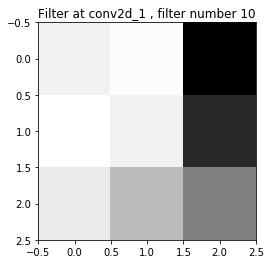

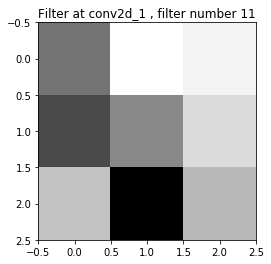

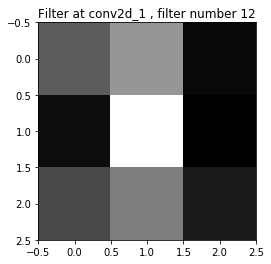

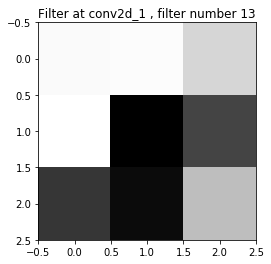

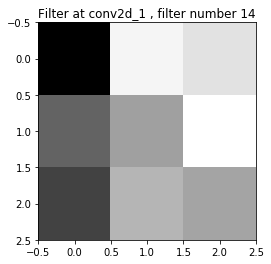

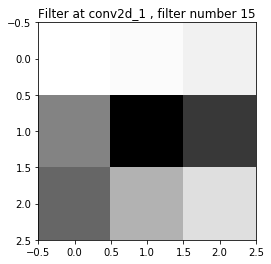

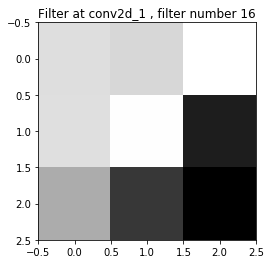

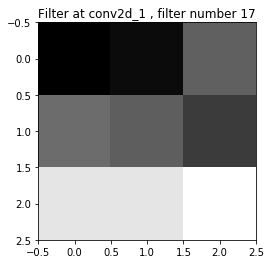

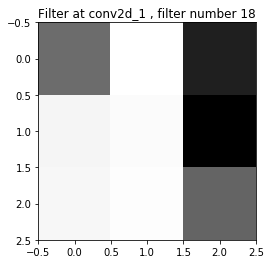

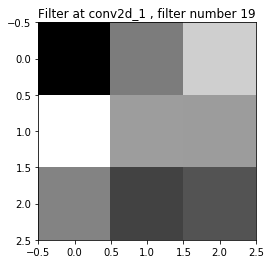

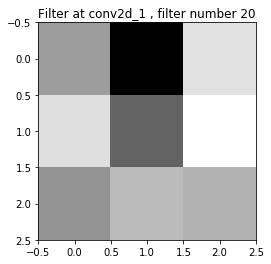

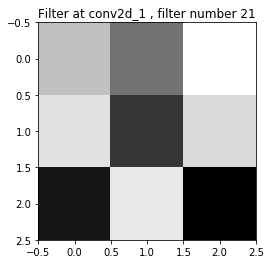

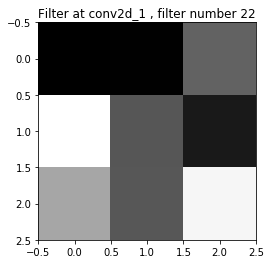

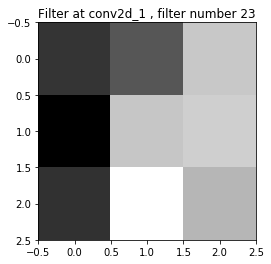

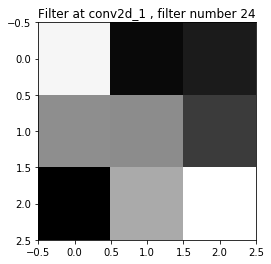

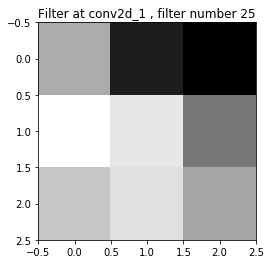

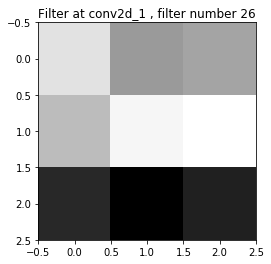

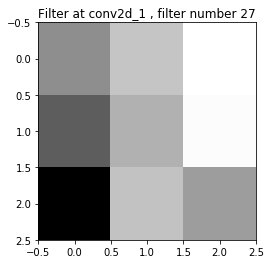

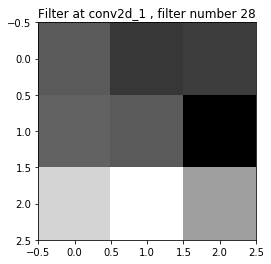

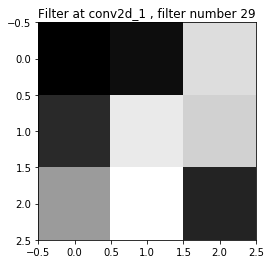

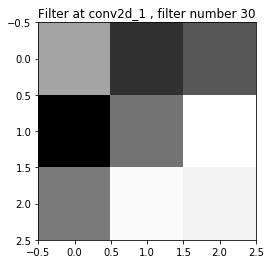

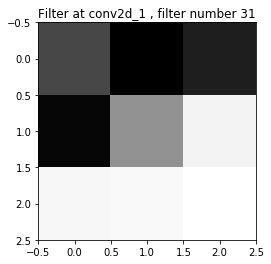

In [36]:
visualise_layer('conv2d_1')

In [37]:
# Module imports
import dataset as mnist_dataset
import model_lib

batch_size=1
data_dir="/tmp/tensorflow/mnist/input_data"
test_ds = mnist_dataset.test(data_dir).batch(batch_size)

In [45]:
def intermediate_model(inputs,outputs):
    return tf.keras.Model(inputs,outputs)

In [68]:
inter_model=intermediate_model(model.input,model.get_layer("conv2d_1").output)

In [70]:
count=0

for x,t in test_ds:
    if count <10:
        print(inter_model.predict(x,batch_size=1).shape)
        count+=1
    else:
        break

(1, 32, 14, 14)
(1, 32, 14, 14)
(1, 32, 14, 14)
(1, 32, 14, 14)
(1, 32, 14, 14)
(1, 32, 14, 14)
(1, 32, 14, 14)
(1, 32, 14, 14)
(1, 32, 14, 14)
(1, 32, 14, 14)
